Exploring NCAA Mens Basketball Season: 24-25


In [11]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import numpy as np

df = pd.read_csv("/Users/adronallen/Downloads/archive (23)/cbb25.csv")

In [12]:
# Simple cleaning or transformation if applicable
print(df.shape)
df.isna()

(364, 25)


,RK,Team,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,FTRD,2P_O,2P_D,3P_O,3P_D,3PR,3PRD,ADJ_T,WAB,SEED
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
360,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [13]:
df.columns

df = df.rename(columns={
    '2P_O': '2Point_%',
    '3P_O' : '3Point_%',
    'WAB' : 'Wins Above Bubble',
    'TORD' : 'Steal%'     
})

Does a team’s steal percentage affect its adjusted win efficiency and influence its postseason placement?

In [14]:
df.groupby('Team')[['Steal%', 'ADJOE', 'RK']].mean().sort_values(by='ADJOE', ascending=False)

,Steal%,ADJOE,RK
Team,,,
Auburn,17.4,129.0,3.0
Duke,17.7,128.5,2.0
Florida,17.0,127.7,4.0
Alabama,13.5,127.6,5.0
Missouri,20.0,127.0,16.0
...,...,...,...
Alabama A&M,21.0,92.8,358.0
Chicago St.,18.2,92.5,361.0
Cal St. Fullerton,16.1,92.1,354.0


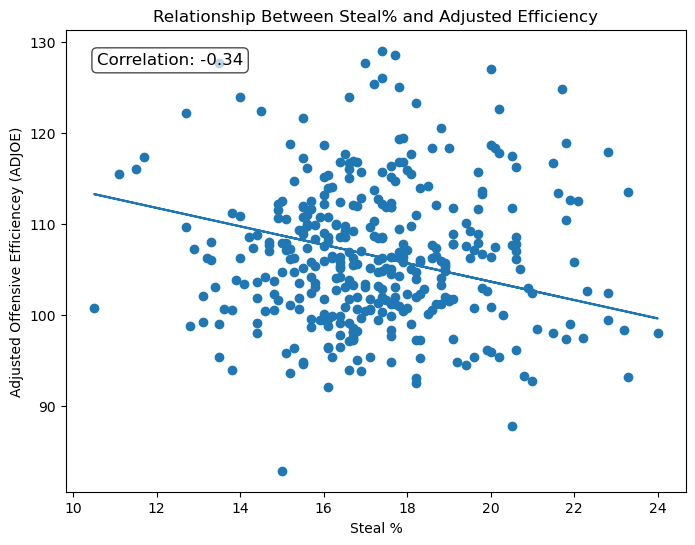

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(df['Steal%'], df['ADJOE'])

x = df['Steal%']
y = df['ADJDE']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)


plt.xlabel('Steal %')
plt.ylabel('Adjusted Offensive Efficiencey (ADJOE)')
plt.title('Relationship Between Steal% and Adjusted Efficiency')

corr = np.corrcoef(x, y)[0, 1] 
plt.text(0.05, 0.95, f'Correlation: {corr:.2f}', transform=plt.gca().transAxes,
    fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

plt.show()

Does a team’s free throw rate affect its adjusted win efficiency and influence its postseason placement in the B1G?

In [16]:
df_B10 = df[df['CONF']== 'B10'].copy()

df_B10.groupby('Team')[['FTR', 'ADJOE', 'RK']].mean().sort_values(by='FTR', ascending=False)

,FTR,ADJOE,RK
Team,,,
Penn St.,37.9,113.6,64.0
Michigan St.,37.8,116.8,13.0
USC,36.4,116.8,59.0
Rutgers,36.2,115.7,68.0
Nebraska,36.0,111.9,62.0
Ohio St.,35.8,116.8,41.0
Michigan,35.0,115.1,26.0
Purdue,34.6,125.0,18.0
Illinois,34.6,122.2,23.0


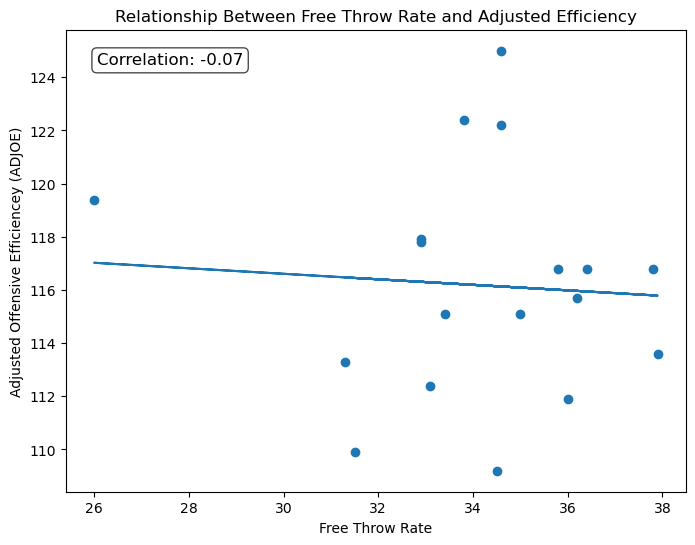

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(df_B10['FTR'], df_B10['ADJOE'])

x = df_B10['FTR']
y = df_B10['ADJOE']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)


plt.xlabel('Free Throw Rate')
plt.ylabel('Adjusted Offensive Efficiencey (ADJOE)')
plt.title('Relationship Between Free Throw Rate and Adjusted Efficiency')

corr = np.corrcoef(x, y)[0, 1] 
plt.text(0.05, 0.95, f'Correlation: {corr:.2f}', transform=plt.gca().transAxes,
    fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

plt.show()

Takeaway for Q1 & Q2 : Steal% has a weak negative relationship with adjusted offensive efficiency (ADJOE), indicating that teams with higher steal rates may slightly have lower offensive efficiency. Free Throw Rate (FTR), however, shows virtually no correlation with ADJOE. Overall, neither Steal% nor FTR alone appears to strongly determine team rankings or postseason outcomes.

Which regular-season metrics best explain a team’s NCAA Tournament seed?

In [18]:
df.columns

Index(['RK', 'Team', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O',
       'EFG_D', 'TOR', 'Steal%', 'ORB', 'DRB', 'FTR', 'FTRD', '2Point_%',
       '2P_D', '3Point_%', '3P_D', '3PR', '3PRD', 'ADJ_T', 'Wins Above Bubble',
       'SEED'],
      dtype='object')

In [23]:
print(df.groupby('Team')['SEED'].sum())

Team
Abilene Christian     0.0
Air Force             0.0
Akron                13.0
Alabama               2.0
Alabama A&M           0.0
                     ... 
Wright St.            0.0
Wyoming               0.0
Xavier               11.0
Yale                 13.0
Youngstown St.        0.0
Name: SEED, Length: 364, dtype: float64


In [27]:
from sklearn.ensemble import RandomForestRegressor
df_model = df.dropna(subset=['SEED']).copy()

features = [
    'ADJOE','ADJDE','BARTHAG',
    'EFG_O','EFG_D',
    'TOR','Steal%','ORB','DRB',
    'FTR','FTRD',
    '2Point_%','2P_D',
    '3Point_%','3P_D',
    'ADJ_T',
    'Wins Above Bubble'
]

X = df_model[features]
y = df_model['SEED']

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X, y)

importance = pd.Series(rf.feature_importances_, index=features)\
                .sort_values(ascending=False)


mportances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(importance)


Wins Above Bubble    0.833539
BARTHAG              0.131870
ADJDE                0.004324
FTR                  0.003562
ADJOE                0.003535
3Point_%             0.003108
EFG_D                0.002529
2Point_%             0.002387
3P_D                 0.002176
ADJ_T                0.002009
TOR                  0.001889
DRB                  0.001882
ORB                  0.001667
EFG_O                0.001645
FTRD                 0.001499
Steal%               0.001389
2P_D                 0.000990
dtype: float64


Takeaway: NCAA Tournament seeding is overwhelmingly driven by résumé strength (Wins Above Bubble), while efficiency and play-style metrics play a secondary, fine-tuning role.

Did the committee overvalue or undervalue certain teams based on efficiency?

In [29]:
df['efficiency_score'] = (
    df['ADJOE']
    - df['ADJDE']
    + df['BARTHAG'] * 100
)

df['expected_seed'] = pd.qcut(
    df['efficiency_score'].rank(ascending=False),
    q=16,
    labels=range(1,17)
).astype(int)

df['seed_diff'] = df['SEED'] - df['expected_seed']

# Look at top differences
df[['Team', 'SEED', 'expected_seed', 'seed_diff']].sort_values('seed_diff', ascending=False).head(10)

# Check negative differences (over-seeded)
df[['Team', 'SEED', 'expected_seed', 'seed_diff']].sort_values('seed_diff').head(10)


,Team,SEED,expected_seed,seed_diff
0,Houston,1.0,1,0.0
1,Duke,1.0,1,0.0
2,Auburn,1.0,1,0.0
3,Florida,1.0,1,0.0
4,Alabama,2.0,1,1.0
5,Tennessee,2.0,1,1.0
14,St. John's,2.0,1,1.0
12,Michigan St.,2.0,1,1.0
59,Memphis,5.0,3,2.0
16,Kentucky,3.0,1,2.0


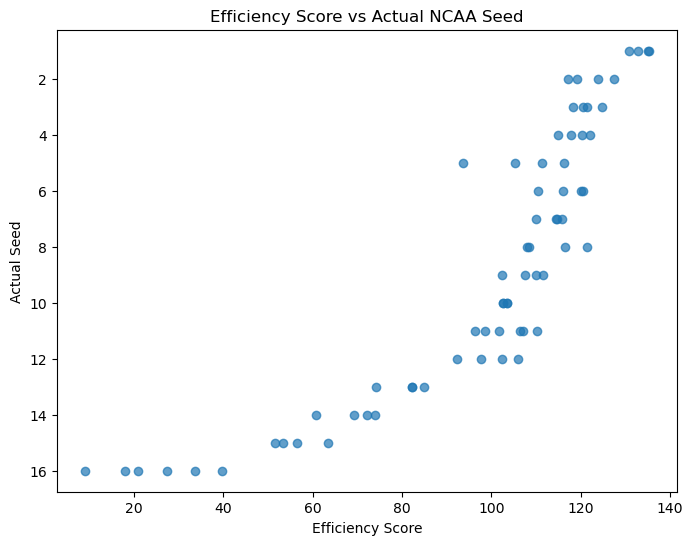

In [30]:
#Scatter: Seed vs Efficiency Score
plt.figure(figsize=(8,6))
plt.scatter(df['efficiency_score'], df['SEED'], alpha=0.7)
plt.xlabel('Efficiency Score')
plt.ylabel('Actual Seed')
plt.title('Efficiency Score vs Actual NCAA Seed')
plt.gca().invert_yaxis()  # Lower seed = better
plt.show()


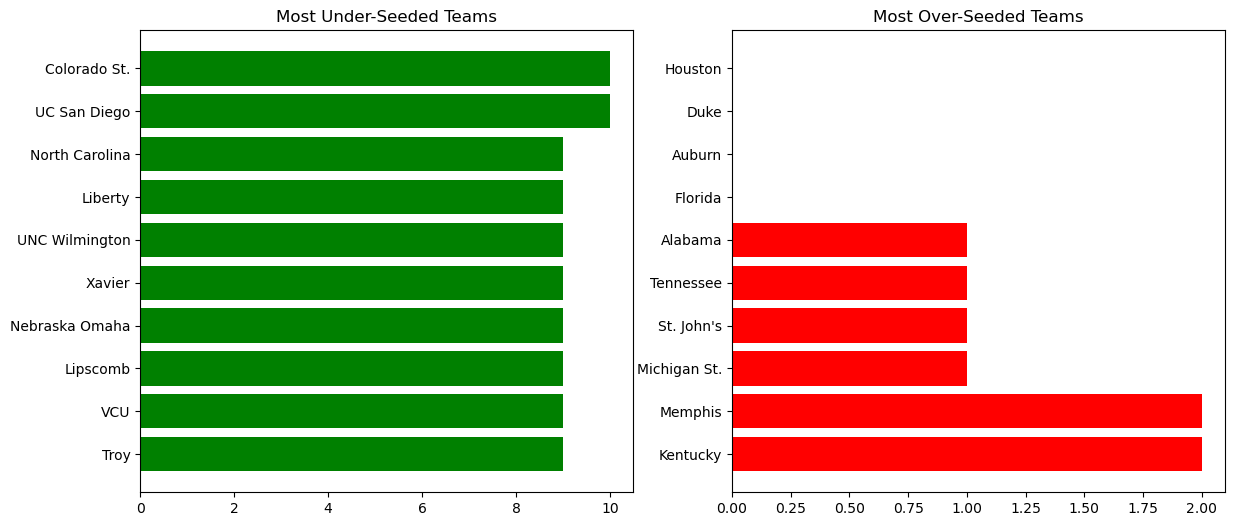

In [31]:
# Bar Chart: Most under- and over-seeded teams
top_under = df.sort_values('seed_diff', ascending=False).head(10)
top_over = df.sort_values('seed_diff').head(10)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

ax[0].barh(top_under['Team'], top_under['seed_diff'], color='green')
ax[0].set_title('Most Under-Seeded Teams')
ax[0].invert_yaxis()

ax[1].barh(top_over['Team'], top_over['seed_diff'], color='red')
ax[1].set_title('Most Over-Seeded Teams')
ax[1].invert_yaxis()

plt.show()



Note: Teams with large positive seed differences were under-seeded relative to their efficiency, while those with large negative differences were over-seeded. This highlights potential sleepers and over-rated seeds for the NCAA Tournament

**Takeaway**: 
Under-Seeded Teams (Green)
Colorado St., UC San Diego, North Carolina, Liberty, UNC Wilmington…
These teams performed better than their seed suggests based on efficiency and power metrics.
Implication: They could be sleepers in the tournament—likely to upset higher-seeded teams.
Many are mid-major programs, showing the committee may undervalue strong non-Power 5 resumes.


Over-Seeded Teams (Red): 
Kentucky, Memphis, Duke, Houston…
These teams are seeded higher than their efficiency indicates.
Implication: They may be more vulnerable to early upsets.
Several are traditional powerhouse programs, suggesting reputation influences seeding beyond pure performance metrics.


General Pattern
Résumés vs Efficiency:
- Wins Above Bubble and historical reputation likely dominate seeding.
- Efficiency-based metrics fine-tune but don’t fully override committee judgment.

Takeaway for bracket analysis:
- Look for high-efficiency, low-seed teams for potential tournament surprises.
- Watch over-seeded teams with borderline efficiency—they’re at risk in early rounds.